In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
sys.path.insert(0, os.path.abspath('./tagcat/'))
sys.path.insert(0, os.path.abspath('./tasks/'))

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
from tagcat.checkpoints import load_logs, craft_filename

In [12]:
filename = craft_filename(
	pondernet=True,
	highway=False,
	reset=False,
	norm_pos='post'
)

loss_logs = {}
load_logs('log_' + filename + '.pkl', loss_logs)

Logs loaded


In [15]:
print(loss_logs.keys())

dict_keys(['train_loss', 'tr_acc', 'val_acc', 'epoch', 'n_updates_train', 'n_updates_eval'])


In [23]:
print(loss_logs['train_loss'][:20])

[2.6711573600769043, 2.571932792663574, 2.558018207550049, 2.5280871391296387, 2.5111544132232666, 2.495657205581665, 2.5079550743103027, 2.4368252754211426, 2.4290852546691895, 2.4386332035064697, 2.404750108718872, 2.3683743476867676, 2.3496036529541016, 2.361664295196533, 2.318572998046875, 2.339653968811035, 2.309490442276001, 2.2827606201171875, 2.228503704071045, 2.251798152923584]


In [28]:
train_loss_log = loss_logs['train_loss']
tr_acc_log = loss_logs['tr_acc']
val_acc_log = loss_logs['val_acc']
epochs = loss_logs['epoch']
batches_num = 10 # the batch number used during training
warm_restart_period = 30
print('trained for all epochs:', loss_logs['epoch']==(len(train_loss_log) // batches_num))

trained for all epochs: True


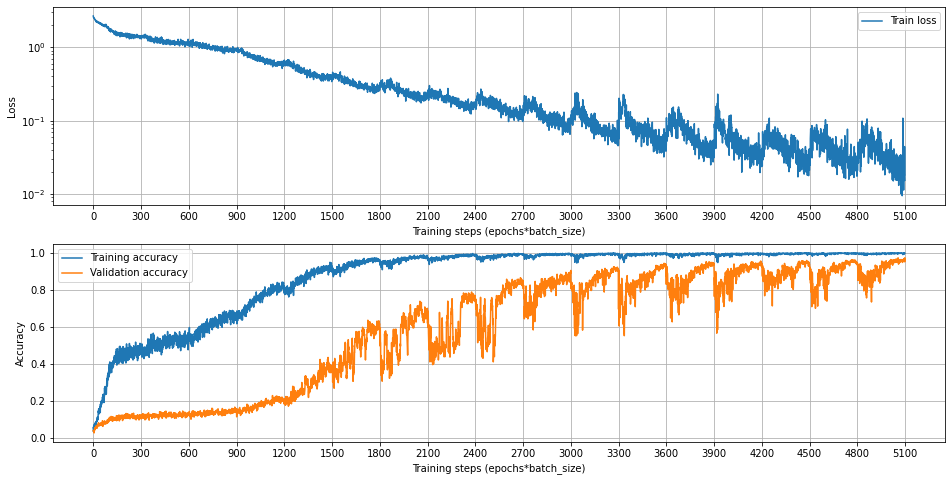

In [30]:
fig, axs = plt.subplots(2, 1, figsize=(2*8, 1*8))
axs[0].semilogy(train_loss_log, label='Train loss')
axs[1].plot(tr_acc_log, label='Training accuracy')
axs[1].plot(val_acc_log, label='Validation accuracy')
axs[0].set_xlabel('Training steps (epochs*batch_size)')
axs[0].set_ylabel('Loss')
axs[1].set_xlabel('Training steps (epochs*batch_size)')
axs[1].set_ylabel('Accuracy')

x_ticks = batches_num * np.arange(epochs+1, step=warm_restart_period)

for ax in axs:
  ax.set_xticks(ticks=x_ticks)
  ax.grid()
  ax.legend()
plt.show()